# RESTAURANT REVENUE PREDICTION


In [1]:
!pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6502 sha256=2b2cfc1153c3a59c7208daa1c962779945a956e9613d75f0587b7ecedf366790
  Stored in directory: /root/.cache/pip/wheels/1b/6c/cb/f9aae2bc97333c3d6e060826c1ee9e44e46306a178e5783505
Successfully built uuid


In [2]:
import jovian

In [3]:
!pip install opendatasets pandas numpy scikit-learn xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import opendatasets as od

In [5]:
dataset_url = 'https://www.kaggle.com/competitions/restaurant-revenue-prediction/data'

In [6]:
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: abdulmajid23
Your Kaggle Key: ··········


100%|██████████| 2.68M/2.68M [00:00<00:00, 159MB/s]


Extracting archive ./restaurant-revenue-prediction/restaurant-revenue-prediction.zip to ./restaurant-revenue-prediction


In [7]:
data_dir = 'restaurant-revenue-prediction'

In [8]:
 !ls -lh {data_dir}

total 4.0M
-rw-r--r-- 1 root root 1.6M Feb  1 20:46 sampleSubmission.csv
-rw-r--r-- 1 root root 2.5M Feb  1 20:46 test.csv.zip
-rw-r--r-- 1 root root 4.6K Feb  1 20:46 train.csv.zip


In [9]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "./restaurant-revenue-prediction/test.csv.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
test.csv                                       2015-03-23 12:22:58     12843982
Extracting all the files now...
Done!


In [10]:
# importing required modules
from zipfile import ZipFile
  
# specifying the zip file name
file_name = "./restaurant-revenue-prediction/train.csv.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

File Name                                             Modified             Size
train.csv                                      2015-03-19 19:16:06        18885
Extracting all the files now...
Done!


In [19]:
!wc -l {data_dir}/train.csv

138 restaurant-revenue-prediction/train.csv


In [20]:
!wc -l {data_dir}/test.csv

100001 restaurant-revenue-prediction/test.csv


In [13]:
!wc -l {data_dir}/sampleSubmission.csv

100001 restaurant-revenue-prediction/sampleSubmission.csv


In [21]:
!head {data_dir}/train.csv

Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
5,02/12/2010,Ankara,Big Cities,FC,6,6.0,4.5,7.5,8,10,10,8,8,8,10,8,6.0,0,0,0,0,0,5,6,3,1,5,0,0,0.0,0.0,7.5,5.0,0,0,0,0,0,0,0,0,5017319.0
6,10/

In [22]:
!head {data_dir}/test.csv

Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,2,5,4,5,5,5,3,4.0,0,0,0,2,0,5,5,3,1,4,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,2,5,3,4,4,2,4,5.0,0,0,0,0,0,5,5,3,2,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,2,5,4,4,5,4,5,5.0,0,0,0,0,0,5,5,5,5,5,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,3,5,4,5,4,3,4,5.0,0,0,0,0,4,4,4,3,2,2,0,0,0.0,0.0,2.0,3.0,0,4,0,0,0,0,0,0
4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,2,5,4,5,4,3,5,4.0,0,0,0,0,0,1,5,3,1,1,0,0,0.0,0.0,5.0,3.0,0,0,0,0,0,0,0,0
5,11/29/2007,Eskişehir,Other,FC,4,4.5,5.0,4.0,2,6,5,5,10,10,2,5,7.5,0,0,0,0,0,2,5,3,2,3,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
6,11/05/2008,Rize,Other,FC,4,2.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,0,0,1,0,5,5,2,2,3,2,5,0.0,0.0,1.0

In [23]:
!head {data_dir}/sampleSubmission.csv 

Id,Prediction
0,4453532.6
1,4453532.6
2,4453532.6
3,4453532.6
4,4453532.6
5,4453532.6
6,4453532.6
7,4453532.6
8,4453532.6


In [24]:
import pandas as pd

In [25]:
df = pd.read_csv(data_dir+"/train.csv")
                

In [26]:
df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,7217634.0


In [27]:
df['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

In [28]:
df['City Group'].replace({'Big Cities': 0, 'Other': 1})

0      0
1      0
2      1
3      1
4      1
      ..
132    1
133    0
134    1
135    0
136    0
Name: City Group, Length: 137, dtype: int64

In [29]:
df['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [30]:
df.Type = df.Type.replace(to_replace=['IL', 'FC', 'DT'], value=[1, 2, 3])

In [32]:
df['Open Date'] = pd.to_datetime(df['Open Date'])

In [ ]:
df

In [33]:
df['City Group'] = df['City Group'].replace({'Big Cities': 0, 'Other': 1})

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Id          137 non-null    int64         
 1   Open Date   137 non-null    datetime64[ns]
 2   City        137 non-null    object        
 3   City Group  137 non-null    int64         
 4   Type        137 non-null    int64         
 5   P1          137 non-null    int64         
 6   P2          137 non-null    float64       
 7   P3          137 non-null    float64       
 8   P4          137 non-null    float64       
 9   P5          137 non-null    int64         
 10  P6          137 non-null    int64         
 11  P7          137 non-null    int64         
 12  P8          137 non-null    int64         
 13  P9          137 non-null    int64         
 14  P10         137 non-null    int64         
 15  P11         137 non-null    int64         
 16  P12         137 non-null  

In [ ]:
jovian.commit()

In [130]:
df.describe()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,0.430657,1.569343,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,0.496985,0.511567,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,0.000000,1.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,0.000000,2.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,1.000000,3.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [ ]:
jovian.commit()

In [35]:
test_df = pd.read_csv(data_dir+'/test.csv')

In [ ]:
test_df

In [36]:
test_df['City Group'].unique()

array(['Other', 'Big Cities'], dtype=object)

In [37]:
test_df.Type.unique()


array(['FC', 'IL', 'DT', 'MB'], dtype=object)

In [38]:
test_df['Open Date'] = pd.to_datetime(test_df['Open Date'])
test_df['City Group'] = test_df['City Group'].replace({'Big Cities': 0, 'Other': 1})
test_df.Type = test_df.Type.replace(to_replace=['IL', 'FC', 'DT', 'MB'], value=[1, 2, 3, 4])


In [131]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 53 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Id                       100000 non-null  int64         
 1   Open Date                100000 non-null  datetime64[ns]
 2   City                     100000 non-null  object        
 3   City Group               100000 non-null  int64         
 4   Type                     100000 non-null  int64         
 5   P1                       100000 non-null  int64         
 6   P2                       100000 non-null  float64       
 7   P3                       100000 non-null  float64       
 8   P4                       100000 non-null  float64       
 9   P5                       100000 non-null  int64         
 10  P6                       100000 non-null  int64         
 11  P7                       100000 non-null  int64         
 12  P8               

In [132]:
test_df.describe()

,Id,City Group,Type,P1,P2,P3,P4,P5,P6,P7,...,Open Date_month,Open Date_day,Open Date_weekday,Open Date_quarter,Open Date_month_start,Open Date_month_end,Open Date_quarter_start,Open Date_quarter_end,Open Date_year_start,Open Date_year_end
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.507280,1.623770,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,...,6.954610,14.52091,3.101490,2.629070,0.07147,0.021970,0.005920,0.012440,0.002860,0.006090
std,28867.657797,0.499949,0.544944,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,...,3.376733,9.00582,1.770927,1.106098,0.25761,0.146586,0.076714,0.110839,0.053403,0.077801
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,...,1.000000,1.00000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,0.000000,1.000000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,...,4.000000,6.00000,2.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,1.000000,2.000000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,...,7.000000,15.00000,4.000000,3.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,1.000000,2.000000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,...,10.000000,22.00000,4.000000,4.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99999.000000,1.000000,4.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,...,12.000000,31.00000,6.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df[('Open Date')] = df[('Open Date')].values.astype("datetime64[ns]")

In [ ]:
test_df[('Open Date')] = test_df[('Open Date')].values.astype("datetime64[ns]")

In [ ]:
test_df

Split Training & Validation Set
- We'll set aside 20% of the training data as the validation set, to evaluate the models we train on previously unseen data.

- Since the test set and training set have the same date ranges, we can pick a random 20% fraction

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


In [42]:
len(train_df), len(val_df)

(109, 28)

Fill/Remove Missing Values

In [43]:
train_df = train_df.dropna()
val_df = val_df.dropna()

Extract Inputs and Outputs


In [44]:
train_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [133]:
input_cols = ['P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']

In [47]:
target_col = 'revenue'

Training

In [134]:
train_inputs = train_df[input_cols]


In [135]:
train_targets = train_df[target_col]


In [136]:
train_inputs

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
10,9,6.0,6.0,6.0,4,4,10,8,10,10,...,10.0,2.5,0,0,0,0,0,0,0,0
130,3,4.0,3.0,4.0,2,1,5,5,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
51,2,2.0,4.0,4.0,2,2,4,4,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
11,2,4.0,4.0,4.0,2,5,5,5,5,5,...,3.0,3.0,5,5,4,2,3,4,4,2
114,4,5.0,5.0,4.0,2,2,5,4,5,5,...,4.0,1.0,5,3,3,2,3,4,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,12,7.5,6.0,6.0,2,10,10,10,10,10,...,10.0,7.5,5,6,10,6,18,12,12,6
106,3,3.0,6.0,6.0,4,2,2,8,10,10,...,2.5,7.5,0,0,0,0,0,0,0,0
14,2,2.0,4.0,4.0,1,2,5,5,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
92,12,7.5,7.5,6.0,2,10,10,8,8,10,...,10.0,7.5,0,0,0,0,0,0,0,0


In [137]:
train_targets

10     3745135.0
130    3376145.0
51     3273041.0
11     5161370.0
114    4155435.0
         ...    
71     4136425.0
106    4888774.0
14     1999097.0
92     6782425.0
102    2738052.0
Name: revenue, Length: 109, dtype: float64

In [138]:
val_inputs = val_df[input_cols]


In [139]:
val_targets = val_df[target_col]


In [140]:
val_inputs

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
105,1,2.0,5.0,3.0,1,2,1,5,5,5,...,1.0,2.0,0,0,0,0,0,0,0,0
104,4,5.0,4.0,3.0,1,3,5,5,5,5,...,2.0,3.0,5,5,3,3,5,4,3,2
12,2,2.0,4.0,4.0,2,1,5,4,5,5,...,1.0,3.0,0,0,0,0,0,0,0,0
26,3,5.0,4.0,5.0,2,3,5,3,5,4,...,3.0,3.0,5,5,4,3,3,4,3,1
123,1,1.0,4.0,3.0,1,1,1,4,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
66,2,2.0,4.0,3.0,1,1,1,4,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
64,12,7.5,6.0,6.0,2,8,10,10,10,10,...,5.0,7.5,20,15,25,4,24,15,20,6
115,6,4.5,6.0,6.0,4,8,10,10,10,10,...,5.0,7.5,25,15,25,4,18,12,16,8
133,4,5.0,4.0,4.0,2,3,5,4,4,5,...,3.0,3.0,0,0,0,0,0,0,0,0
85,3,5.0,4.0,4.0,2,5,5,4,5,4,...,2.0,3.0,0,0,0,0,0,0,0,0


In [141]:
val_targets

105     2792031.0
104     4467728.0
12      1734634.0
26      2267425.0
123     4263629.0
66      1882131.0
64      2551252.0
115     4882985.0
133     9262754.0
85      7495092.0
84      4250553.0
45      3752885.0
69      3452382.0
67      4052733.0
31      2058644.0
42      4952255.0
27      5435276.0
19      2021934.0
132     5787594.0
56      2390534.0
125     4780607.0
4       4316715.0
109     4219263.0
36      3028267.0
89      2364478.0
100     9652350.0
16     19696939.0
18      5337526.0
Name: revenue, dtype: float64

Test

In [142]:
test_inputs = test_df[input_cols]


In [143]:
test_inputs


,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,1.0,3.0,0,0,0,0,0,0,0,0
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,...,7.5,5.0,0,0,0,4,0,0,0,0


In [ ]:
jovian.commit()

Train Hardcoded & Baseline Models
- Hardcoded model: always predict average revenue
- Baseline model: Linear regression


Train & Evaluate Hardcoded Model

In [144]:
import numpy as np


In [145]:
class MeanRegressor():
    def fit(self, inputs, targets):
        self.mean = targets.mean()

    def predict(self, inputs):
        return np.full(inputs.shape[0], self.mean)


In [146]:
mean_model = MeanRegressor()

In [147]:
mean_model.fit(train_inputs, train_targets)


In [148]:
mean_model.mean

4375994.23853211

In [63]:
train_preds = mean_model.predict(train_inputs)


In [150]:
train_preds

array([ 5484206.69821504,  4719200.54316565,  2205105.97527134,
        5147026.47753844,  4259298.95939845,  3198056.13579884,
        4512692.10702536,  4559040.79067531,  4669320.12831727,
        6011644.50359368,  3097790.32255599,  4695066.428377  ,
        6831468.39309326,  7918699.59102941,  3049832.53402904,
        4847162.75164324,  1784850.61090642,  5245702.57609862,
        2922967.95372078,  2887927.33590722,  3458525.1712513 ,
        2575384.24470186,  5650306.82122365,  5752826.15189686,
        6165943.94621238,  9194727.12132213,  2053312.5741837 ,
        5769282.92226064,  3470096.87841949,  4602950.12368706,
        3703393.60514414,  5012971.22654393,  5367049.9286823 ,
        7373618.14888251,  6244883.33920079,  3462594.8862648 ,
        2733570.19994912,  3555446.84417066,  4939710.03065109,
        3760242.8345347 ,  2664302.41212013, 10011383.75529808,
        3157269.69833913,  4897305.92765775,  3863964.92687061,
        4142628.50479776,  3423405.34835

In [151]:
train_targets

10     3745135.0
130    3376145.0
51     3273041.0
11     5161370.0
114    4155435.0
         ...    
71     4136425.0
106    4888774.0
14     1999097.0
92     6782425.0
102    2738052.0
Name: revenue, Length: 109, dtype: float64

In [152]:
val_preds = mean_model.predict(val_inputs)
val_preds


array([4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211, 4375994.23853211, 4375994.23853211,
       4375994.23853211])

In [153]:
val_targets 

105     2792031.0
104     4467728.0
12      1734634.0
26      2267425.0
123     4263629.0
66      1882131.0
64      2551252.0
115     4882985.0
133     9262754.0
85      7495092.0
84      4250553.0
45      3752885.0
69      3452382.0
67      4052733.0
31      2058644.0
42      4952255.0
27      5435276.0
19      2021934.0
132     5787594.0
56      2390534.0
125     4780607.0
4       4316715.0
109     4219263.0
36      3028267.0
89      2364478.0
100     9652350.0
16     19696939.0
18      5337526.0
Name: revenue, dtype: float64

In [154]:
from sklearn.metrics import mean_squared_error


In [155]:
def rsme(targets, preds):
    return mean_squared_error(targets, preds, squared=False)

In [156]:
train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
train_rmse

1525302.3169612505

In [157]:
val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
val_rmse

3518219.755194293

Train & Evaluate Baseline Model
- We'll train a linear regression model as our baseline, which tries to express the target as a weighted sum of the inputs.



In [158]:
from sklearn.linear_model import LinearRegression


In [159]:
linreg_model = LinearRegression()


In [160]:
linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [161]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([ 5909500.07662184,  4216242.33966954,  2459387.71451401,
        4589022.8451477 ,  3654773.94094013,  2461600.49675438,
        4412304.38965005,  4636085.46974963,  4731959.51120412,
        5462766.43552126,  3386048.62101563,  5555864.42915558,
        7445836.43467391,  7580045.67304973,  3180529.48560521,
        4539653.33638789,  2737566.56059325,  4734296.74413211,
        3097279.4778012 ,  2888236.78328822,  2935693.71431868,
        3484536.15000843,  5924925.0055523 ,  6131325.04078603,
        6780665.86230314,  9186664.35500273,  2573866.90441659,
        5760693.9021608 ,  4311838.51656294,  3966842.90166098,
        4172402.78106131,  4879542.34363533,  4553509.54723553,
        6308187.76739146,  5049131.43901883,  3046440.53961885,
        3675236.65305413,  3827511.00552656,  5199580.67160478,
        3917901.16069542,  2718741.52889019, 10484042.29621274,
        2608895.22483337,  5164564.38449631,  3790493.39743226,
        4442414.14093879,  2684021.62456

In [162]:
train_targets

10     3745135.0
130    3376145.0
51     3273041.0
11     5161370.0
114    4155435.0
         ...    
71     4136425.0
106    4888774.0
14     1999097.0
92     6782425.0
102    2738052.0
Name: revenue, Length: 109, dtype: float64

In [163]:
train_rsme = mean_squared_error(train_targets, train_preds, squared=False)
train_rsme

1633929.43082441

In [164]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([ 2480433.54959437, -2676811.91795901,  1974982.26012497,
        5085938.5079989 ,  4797791.87052252,  4034271.49430067,
        7476796.34155553,  1834625.37894286,  4885354.52997996,
        4631910.08181292,  1218920.95950735,  -320206.42967602,
        3706689.00710156,  7069159.62173087,  1502641.59023729,
        3083970.39776846,  4548768.19625393,  4147395.18425648,
        3552766.81242387,  4073549.56986446, -6033368.50021547,
        2465801.73247237,  4824766.73791544,  3218442.00930671,
        3994736.92727048,  5066134.53345302,  4388800.31034798,
        3697780.80113345])

In [165]:
rsme(val_targets, val_preds)

4465492.678347902

5. Make Predictions and Submit to Kaggle
- Make predictions for test set
- Generate submissions CSV
- Submit to Kaggle
- Record in experiment tracking sheet

In [166]:
test_inputs

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,1.0,3.0,0,0,0,0,0,0,0,0
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,...,7.5,5.0,0,0,0,4,0,0,0,0


In [167]:
test_preds = linreg_model.predict(test_inputs)

In [168]:
sub_df = pd.read_csv(data_dir+'/sampleSubmission.csv')
sub_df['Prediction'] = test_preds

In [170]:
sub_df

,Id,Prediction
0,0,5.726463e+06
1,1,2.979204e+06
2,2,1.699815e+06
3,3,6.310250e+06
4,4,7.375880e+06
...,...,...
99995,99995,3.650596e+06
99996,99996,3.751165e+06
99997,99997,6.520077e+06
99998,99998,3.788442e+06


In [169]:
sub_df.to_csv('linear_model_submission.csv', index=None)

Reusable Function to create submission file

In [75]:
def predict_and_submit(model, test_inputs, fname):
    test_preds = model.predict(test_inputs)
    sub_df = pd.read_csv(data_dir+'/sampleSubmission.csv')
    sub_df['Prediction'] = test_preds
    sub_df.to_csv(fname, index=None)
    return sub_df

In [ ]:
predict_and_submit(linreg_model, test_inputs, 'linear_sub2.csv')

6. Feature Engineering
- Extract parts of date 
-(Year, Month, Date, Day of Week, Quarter, Day of Year)

In [76]:
def add_dateparts(df, col):
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df[col + '_weekday'] = df[col].dt.weekday
    df[col + '_quarter'] = df[col].dt.quarter
    df[col + '_month_start'] = df[col].dt.is_month_start
    df[col + '_month_end'] = df[col].dt.is_month_end
    df[col + '_quarter_start'] = df[col].dt.is_quarter_start
    df[col + '_quarter_end'] = df[col].dt.is_quarter_end
    df[col + '_year_start'] = df[col].dt.is_year_start
    df[col + '_year_end'] = df[col].dt.is_year_end
    

In [77]:
add_dateparts(train_df, 'Open Date')
add_dateparts(val_df, 'Open Date')
add_dateparts(test_df, 'Open Date')

In [78]:
train_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,Open Date_month,Open Date_day,Open Date_weekday,Open Date_quarter,Open Date_month_start,Open Date_month_end,Open Date_quarter_start,Open Date_quarter_end,Open Date_year_start,Open Date_year_end
10,10,2013-08-09,Kocaeli,1,2,9,6.0,6.0,6.0,4,...,8,9,4,3,False,False,False,False,False,False
130,130,2011-10-29,Osmaniye,1,2,3,4.0,3.0,4.0,2,...,10,29,5,4,False,False,False,False,False,False
51,51,2011-11-08,Kastamonu,1,1,2,2.0,4.0,4.0,2,...,11,8,1,4,False,False,False,False,False,False
11,11,2012-05-22,İstanbul,0,1,2,4.0,4.0,4.0,2,...,5,22,1,2,False,False,False,False,False,False
114,114,2008-12-06,Eskişehir,1,1,4,5.0,5.0,4.0,2,...,12,6,5,4,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,2006-12-06,İstanbul,0,1,12,7.5,6.0,6.0,2,...,12,6,2,4,False,False,False,False,False,False
106,106,2008-06-15,Antalya,1,2,3,3.0,6.0,6.0,4,...,6,15,6,2,False,False,False,False,False,False
14,14,2011-12-29,Bursa,1,2,2,2.0,4.0,4.0,1,...,12,29,3,4,False,False,False,False,False,False
92,92,2002-11-01,İstanbul,0,2,12,7.5,7.5,6.0,2,...,11,1,4,4,True,False,False,False,False,False


In [79]:
train_df = train_df.applymap(lambda x: 1 if x == True else x)
train_df = train_df.applymap(lambda x: 0 if x == False else x)

In [80]:
train_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,Open Date_month,Open Date_day,Open Date_weekday,Open Date_quarter,Open Date_month_start,Open Date_month_end,Open Date_quarter_start,Open Date_quarter_end,Open Date_year_start,Open Date_year_end
10,10,2013-08-09,Kocaeli,1,2,9,6.0,6.0,6.0,4,...,8,9,4,3,0,0,0,0,0,0
130,130,2011-10-29,Osmaniye,1,2,3,4.0,3.0,4.0,2,...,10,29,5,4,0,0,0,0,0,0
51,51,2011-11-08,Kastamonu,1,1,2,2.0,4.0,4.0,2,...,11,8,1,4,0,0,0,0,0,0
11,11,2012-05-22,İstanbul,0,1,2,4.0,4.0,4.0,2,...,5,22,1,2,0,0,0,0,0,0
114,114,2008-12-06,Eskişehir,1,1,4,5.0,5.0,4.0,2,...,12,6,5,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,71,2006-12-06,İstanbul,0,1,12,7.5,6.0,6.0,2,...,12,6,2,4,0,0,0,0,0,0
106,106,2008-06-15,Antalya,1,2,3,3.0,6.0,6.0,4,...,6,15,6,2,0,0,0,0,0,0
14,14,2011-12-29,Bursa,1,2,2,2.0,4.0,4.0,1,...,12,29,3,4,0,0,0,0,0,0
92,92,2002-11-01,İstanbul,0,2,12,7.5,7.5,6.0,2,...,11,1,4,4,1,0,0,0,0,0


In [128]:
test_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,Open Date_month,Open Date_day,Open Date_weekday,Open Date_quarter,Open Date_month_start,Open Date_month_end,Open Date_quarter_start,Open Date_quarter_end,Open Date_year_start,Open Date_year_end
0,0,2011-01-22,Niğde,1,2,1,4.0,4.0,4.0,1,...,1,22,5,1,0,0,0,0,0,0
1,1,2011-03-18,Konya,1,1,3,4.0,4.0,4.0,2,...,3,18,4,1,0,0,0,0,0,0
2,2,2013-10-30,Ankara,0,2,3,4.0,4.0,4.0,2,...,10,30,2,4,0,0,0,0,0,0
3,3,2013-05-06,Kocaeli,1,1,2,4.0,4.0,4.0,2,...,5,6,0,2,0,0,0,0,0,0
4,4,2013-07-31,Afyonkarahisar,1,2,2,4.0,4.0,4.0,1,...,7,31,2,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2000-01-05,Antalya,1,2,5,5.0,4.0,4.0,2,...,1,5,2,1,0,0,0,0,0,0
99996,99996,2011-07-18,Niğde,1,1,1,2.0,4.0,3.0,1,...,7,18,0,3,0,0,0,0,0,0
99997,99997,2012-12-29,İstanbul,0,1,4,5.0,4.0,4.0,1,...,12,29,5,4,0,0,0,0,0,0
99998,99998,2013-10-12,İstanbul,0,2,12,7.5,6.0,6.0,4,...,10,12,5,4,0,0,0,0,0,0


In [82]:
val_df = val_df.applymap(lambda x: 1 if x == True else x)
val_df = val_df.applymap(lambda x: 0 if x == False else x)

In [83]:
test_df = test_df.applymap(lambda x: 1 if x == True else x)
test_df = test_df.applymap(lambda x: 0 if x == False else x)

In [84]:
 val_df

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,Open Date_month,Open Date_day,Open Date_weekday,Open Date_quarter,Open Date_month_start,Open Date_month_end,Open Date_quarter_start,Open Date_quarter_end,Open Date_year_start,Open Date_year_end
105,105,2008-03-15,Aydın,1,2,1,2.0,5.0,3.0,1,...,3,15,5,1,0,0,0,0,0,0
104,104,2007-01-22,Adana,1,1,4,5.0,4.0,3.0,1,...,1,22,0,1,0,0,0,0,0,0
12,12,2013-02-28,Ankara,0,1,2,2.0,4.0,4.0,2,...,2,28,3,1,0,1,0,0,0,0
26,26,2010-02-23,Ankara,0,1,3,5.0,4.0,5.0,2,...,2,23,1,1,0,0,0,0,0,0
123,123,2011-11-05,Bolu,1,2,1,1.0,4.0,3.0,1,...,11,5,5,4,0,0,0,0,0,0
66,66,2010-01-09,Konya,1,2,2,2.0,4.0,3.0,1,...,1,9,5,1,0,0,0,0,0,0
64,64,1998-07-13,İstanbul,0,1,12,7.5,6.0,6.0,2,...,7,13,0,3,0,0,0,0,0,0
115,115,2012-05-04,İstanbul,0,1,6,4.5,6.0,6.0,4,...,5,4,4,2,0,0,0,0,0,0
133,133,2006-10-12,İzmir,0,2,4,5.0,4.0,4.0,2,...,10,12,3,4,0,0,0,0,0,0
85,85,2000-01-07,İstanbul,0,2,3,5.0,4.0,4.0,2,...,1,7,4,1,0,0,0,0,0,0


In [ ]:
jovian.commit()

Save intermediate dataframes

In [129]:
train_df.to_parquet('train.parquet')
val_df.to_parquet('val.parquet')
test_df.to_parquet('test.parquet')

Train & Evaluate Different Models
We'll train each of the following & submit predictions to Kaggle:

- Linear Regression
- Random Forests
- Gradient Boosting


Split Inputs & Targets

In [85]:
train_df.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue', 'Open Date_year', 'Open Date_month',
       'Open Date_day', 'Open Date_weekday', 'Open Date_quarter',
       'Open Date_month_start', 'Open Date_month_end',
       'Open Date_quarter_start', 'Open Date_quarter_end',
       'Open Date_year_start', 'Open Date_year_end'],
      dtype='object')

In [86]:
input_cols = ['City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'Open Date_year', 'Open Date_month',
       'Open Date_day', 'Open Date_weekday', 'Open Date_quarter', 'Open Date_month_start', 'Open Date_month_end',	'Open Date_quarter_start', 'Open Date_quarter_end',	'Open Date_year_start', 	'Open Date_year_end']

In [87]:
target_col = 'revenue'

In [88]:
train_inputs = train_df[input_cols]
train_targets = train_df[target_col]


In [89]:
val_inputs = val_df[input_cols]
val_targets = val_df[target_col]


In [90]:
test_inputs = test_df[input_cols]

Lets define a helper function to evaluate models

In [91]:
def evaluate(model):
    train_preds = model.predict(train_inputs)
    train_rmse = mean_squared_error(train_targets, train_preds, squared=False)
    val_preds = model.predict(val_inputs)
    val_rmse = mean_squared_error(val_targets, val_preds, squared=False)
    return train_rmse, val_rmse, train_preds, val_preds

Ridge Regression

In [92]:
from sklearn.linear_model import Ridge

In [93]:
model1 = Ridge(random_state=42, alpha=0.9)

In [94]:
%%time
model1.fit(train_inputs, train_targets)

CPU times: user 6.35 ms, sys: 1.87 ms, total: 8.22 ms
Wall time: 18.1 ms


Ridge(alpha=0.9, random_state=42)

In [95]:
evaluate(model1)

(1531458.3483940484,
 4414711.143415873,
 array([ 5526118.56499082,  4810737.5977934 ,  2232980.5733988 ,
         4824448.37571463,  3965444.853145  ,  3246489.74416816,
         4291522.67415112,  4772027.43057713,  4975915.57639343,
         5906458.2516779 ,  3095913.07753378,  4679399.20406449,
         6586191.5991464 ,  7853840.13743773,  2992085.44688177,
         4878660.1875062 ,  1884781.95626333,  5271611.84489146,
         2891707.77343622,  2980763.24794686,  3511817.29908034,
         2724174.95105749,  5589555.20278883,  5630690.69672611,
         6190559.19898474,  8926038.57178605,  1970398.85536599,
         5653872.71491149,  3310484.68085417,  4581726.85201403,
         3814137.86099985,  4876984.13873622,  5452879.54584756,
         7226041.57660365,  6362881.43954879,  3438710.37961516,
         2833006.63754404,  3597884.20478588,  4914114.35091472,
         3854863.9878898 ,  2812048.54478157,  9812451.52880609,
         3385746.34324983,  4806538.43685737,  34

In [96]:
predict_and_submit(model1, test_inputs, 'ridge_submission.csv')

,Id,Prediction
0,0,4.232496e+06
1,1,3.302126e+06
2,2,3.093557e+06
3,3,4.483835e+06
4,4,6.558818e+06
...,...,...
99995,99995,4.141207e+06
99996,99996,2.427050e+06
99997,99997,7.177982e+06
99998,99998,3.443719e+06


Random Forest

In [97]:
from sklearn.ensemble import RandomForestRegressor

In [98]:
model2 = RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42, n_estimators=100)

In [99]:
%%time
model2.fit(train_inputs, train_targets)

CPU times: user 275 ms, sys: 22.1 ms, total: 297 ms
Wall time: 235 ms


RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

In [100]:
evaluate(model2)

(921698.1655217543,
 3448541.0297794407,
 array([ 3738987.01436236,  3603217.91834306,  3422290.861875  ,
         4514481.49193379,  4162379.77014045,  4239950.84776579,
         3022966.98521396,  3271358.18352381,  5152906.95277778,
         4962655.06784722,  4066819.8042076 ,  4773503.91951515,
         5576447.66896476,  7993460.98266667,  3491527.0978584 ,
         4786761.46302778,  3767126.77134587,  4099628.14768689,
         3615037.31734524,  3679561.8620809 ,  4154759.63983238,
         4597915.32004292,  6011166.26968452,  6458494.24658333,
         6005127.36378265,  7227079.77773016,  3463355.83639502,
         4264063.50316119,  3415338.23590293,  5003457.28367021,
         2704686.93377378,  5794784.559417  ,  4187667.77798336,
         6187890.52929917,  4682116.28323016,  2032957.32398718,
         4225345.13207846,  5098858.50480952,  4835635.6558631 ,
         2274509.54294444,  3911244.62847132,  7308428.49397744,
         4068699.07303205,  4406011.22000397,  40

In [101]:
predict_and_submit(model2, test_inputs, 'randomforest_submission.csv')

,Id,Prediction
0,0,4.319865e+06
1,1,3.501526e+06
2,2,5.352865e+06
3,3,3.563112e+06
4,4,5.676442e+06
...,...,...
99995,99995,4.396236e+06
99996,99996,3.304446e+06
99997,99997,4.406868e+06
99998,99998,3.734601e+06


Gradient Boosting

In [102]:
from xgboost import XGBRegressor

In [103]:
model3 = XGBRegressor(random_state=42, n_jobs=-1, objective='reg:squarederror', n_estimators=200, max_depth=5)

In [104]:
%%time
model3.fit(train_inputs, train_targets)

CPU times: user 184 ms, sys: 25.3 ms, total: 209 ms
Wall time: 218 ms


XGBRegressor(max_depth=5, n_estimators=200, n_jobs=-1,
             objective='reg:squarederror', random_state=42)

In [105]:
evaluate(model3)


(5139.032353534721,
 3343077.633891366,
 array([ 3741274.8,  3377184.2,  3276539.2,  5158655. ,  4153159.5,
         4577022.5,  2344003.2,  2019087.4,  4759804. ,  5650341. ,
         3869263.5,  5286270.5,  6833167. ,  8906744. ,  3164524.2,
         4287102.5,  3405882.5,  4262796. ,  3219170.8,  3364748.5,
         3817091. ,  3958470. ,  6939363.5,  3348509.2,  6691777.5,
         7866666.5,  3010689.2,  3728773.8,  3566844. ,  5446307. ,
         2375871.8,  7576503.5,  3785837. ,  5969609. ,  4706228. ,
         1754277.1,  3836547.5,  5593281.5,  5018378. ,  1906284.2,
         3808732.5,  8623352. ,  3903147.2,  4109794. ,  3753216.5,
         4486139.5,  2732000.8,  3986147.5,  4063712. ,  2110387.2,
         3779644. ,  4952659.5,  4812527. ,  3809589.2,  2674159.5,
         8210296. ,  5458938. ,  2528121.2,  2954382.5,  5164297.5,
         7208422.5,  3944153.8,  3785666.2,  4650724. ,  2160889.8,
         1280976. ,  4248346. ,  6414885. ,  4350943.5,  2542403. ,
        

In [106]:
predict_and_submit(model3, test_inputs, 'gradientboosting_submission.csv')

,Id,Prediction
0,0,3451738.25
1,1,2408422.00
2,2,5423849.50
3,3,3453046.75
4,4,6585988.50
...,...,...
99995,99995,4475658.00
99996,99996,2899429.25
99997,99997,4126614.75
99998,99998,3741861.00


Tune Hyperparmeters

In [107]:
import matplotlib.pyplot as plt

def test_params(ModelClass, **params):
    """Trains a model with the given parameters and returns training & validation RMSE"""
    model = ModelClass(**params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(model.predict(train_inputs), train_targets, squared=False)
    val_rmse = mean_squared_error(model.predict(val_inputs), val_targets, squared=False)
    return train_rmse, val_rmse

def test_param_and_plot(ModelClass, param_name, param_values, **other_params):
    """Trains multiple models by varying the value of param_name according to param_values"""
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = dict(other_params)
        params[param_name] = value
        train_rmse, val_rmse = test_params(ModelClass, **params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])
best_params = {
    'random_state': 42,
    'n_jobs': -1,
    'objective': 'reg:squarederror'
}


No. of Trees

CPU times: user 580 ms, sys: 5.47 ms, total: 586 ms
Wall time: 367 ms


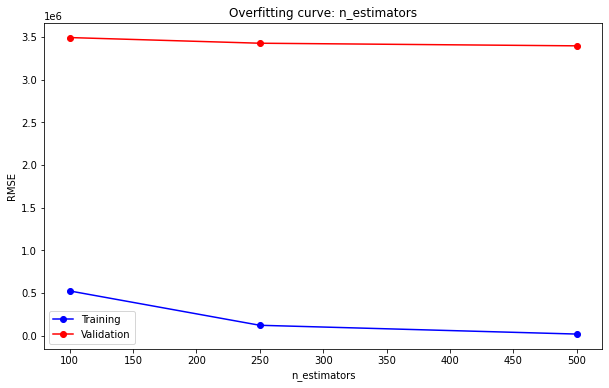

In [108]:
%%time 
test_param_and_plot(XGBRegressor, 'n_estimators', [100, 250, 500], **best_params)

In [109]:
best_params['n_estimators'] = 250

CPU times: user 582 ms, sys: 6.48 ms, total: 589 ms
Wall time: 301 ms


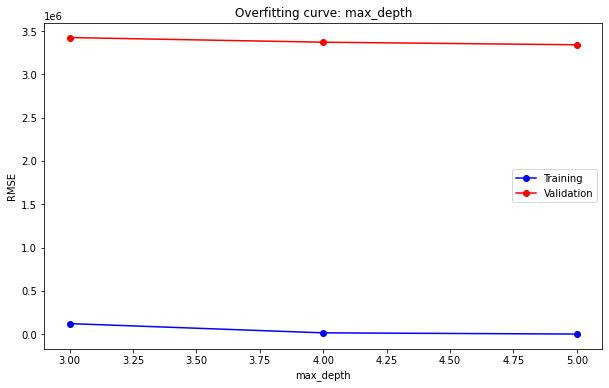

In [110]:
%%time 
test_param_and_plot(XGBRegressor, 'max_depth', [3, 4, 5], **best_params)

In [111]:
best_params['max_depth'] = 5

CPU times: user 732 ms, sys: 10.4 ms, total: 743 ms
Wall time: 396 ms


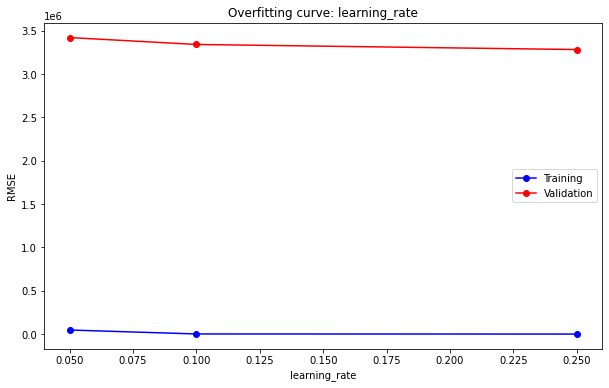

In [112]:
%%time
test_param_and_plot(XGBRegressor, 'learning_rate', [0.05, 0.1, 0.25], **best_params)

In [113]:
best_params['learning_rate'] = 0.25

In [114]:
xgb_model_final = XGBRegressor(objective='reg:squarederror', n_jobs=-1, random_state=42,
                               n_estimators=500, max_depth=5, learning_rate=0.1, 
                               subsample=0.8, colsample_bytree=0.8)


In [115]:
%%time
xgb_model_final.fit(train_inputs, train_targets)


CPU times: user 391 ms, sys: 4.87 ms, total: 396 ms
Wall time: 213 ms


XGBRegressor(colsample_bytree=0.8, max_depth=5, n_estimators=500, n_jobs=-1,
             objective='reg:squarederror', random_state=42, subsample=0.8)

In [116]:
evaluate(xgb_model_final)

(2.5563320824173705,
 3253849.638139607,
 array([ 3745134.2,  3376146.2,  3273041.2,  5161368. ,  4155434.2,
         4590419.5,  2344689. ,  2018785.8,  4758477.5,  5653753.5,
         3871343.5,  5286210. ,  6836484. ,  8904088. ,  3164970.8,
         4286645.5,  3410877.2,  4264175. ,  3218917.2,  3351385.2,
         3818055.5,  3956087.2,  6941171.5,  3347771.5,  6694795. ,
         7865427.5,  3008199. ,  3727369.8,  3570392.5,  5444228.5,
         2371204.8,  7592273.5,  3778620.2,  5966194. ,  4705942. ,
         1756067.1,  3836721.8,  5595268. ,  5017319.5,  1904842.2,
         3807496.8,  8630680. ,  3903884.8,  4100890. ,  3753719.2,
         4491605. ,  2732645. ,  3982769. ,  4066618.8,  2097024.8,
         3780018.8,  4952496. ,  4807737. ,  3810008.2,  2675511.2,
         8213523. ,  5461701. ,  2525374.5,  2954085.8,  5166638. ,
         7217631.5,  3939801.8,  3784230.8,  4651866.5,  2156097. ,
         1270507. ,  4250757.5,  6412625. ,  4350575.5,  2544856. ,
       

In [117]:
predict_and_submit(xgb_model_final, test_inputs, 'Gradientboosting_tuned_submission.csv')

,Id,Prediction
0,0,4221671.00
1,1,3244037.25
2,2,5069854.50
3,3,3838041.00
4,4,6436528.50
...,...,...
99995,99995,4379875.00
99996,99996,2461356.25
99997,99997,3365806.00
99998,99998,3192164.25


Linear Regression Again

In [118]:
linreg_model = LinearRegression()

In [119]:

linreg_model.fit(train_inputs, train_targets)

LinearRegression()

In [120]:
train_preds = linreg_model.predict(train_inputs)
train_preds

array([ 5484206.69821504,  4719200.54316565,  2205105.97527134,
        5147026.47753844,  4259298.95939845,  3198056.13579884,
        4512692.10702536,  4559040.79067531,  4669320.12831727,
        6011644.50359368,  3097790.32255599,  4695066.428377  ,
        6831468.39309326,  7918699.59102941,  3049832.53402904,
        4847162.75164324,  1784850.61090642,  5245702.57609862,
        2922967.95372078,  2887927.33590722,  3458525.1712513 ,
        2575384.24470186,  5650306.82122365,  5752826.15189686,
        6165943.94621238,  9194727.12132213,  2053312.5741837 ,
        5769282.92226064,  3470096.87841949,  4602950.12368706,
        3703393.60514414,  5012971.22654393,  5367049.9286823 ,
        7373618.14888251,  6244883.33920079,  3462594.8862648 ,
        2733570.19994912,  3555446.84417066,  4939710.03065109,
        3760242.8345347 ,  2664302.41212013, 10011383.75529808,
        3157269.69833913,  4897305.92765775,  3863964.92687061,
        4142628.50479776,  3423405.34835

In [121]:
train_rsme = mean_squared_error(train_targets, train_preds, squared=False)
train_rsme

1525302.3169612505

In [122]:
val_preds = linreg_model.predict(val_inputs)
val_preds

array([ 2841685.51912624, -4971732.30286568,  2838709.16660124,
        5626427.04602239,  4917925.14756057,  3666861.01652437,
        7763402.52431262,   169246.52447453,  5350349.82215017,
        4968867.9041816 ,  2152070.98468906, -3501798.50137073,
        4768543.55057296,  5340677.10925552,  1462997.46183565,
        4123416.02917987,  5764070.25532469,  3168874.92057088,
        4129209.91055787,  3566790.42398012, -4688971.52838886,
        1419967.59869286,  5944202.57420099,  2939368.06613675,
        3165886.65505511,  5443535.27237162,  4697420.37912792,
        4710267.98336405])

In [123]:
rsme(val_targets, val_preds)

4582976.079523277

In [124]:
test_inputs

,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,...,Open Date_month,Open Date_day,Open Date_weekday,Open Date_quarter,Open Date_month_start,Open Date_month_end,Open Date_quarter_start,Open Date_quarter_end,Open Date_year_start,Open Date_year_end
0,1,2,1,4.0,4.0,4.0,1,2,5,4,...,1,22,5,1,0,0,0,0,0,0
1,1,1,3,4.0,4.0,4.0,2,2,5,3,...,3,18,4,1,0,0,0,0,0,0
2,0,2,3,4.0,4.0,4.0,2,2,5,4,...,10,30,2,4,0,0,0,0,0,0
3,1,1,2,4.0,4.0,4.0,2,3,5,4,...,5,6,0,2,0,0,0,0,0,0
4,1,2,2,4.0,4.0,4.0,1,2,5,4,...,7,31,2,3,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1,2,5,5.0,4.0,4.0,2,2,5,5,...,1,5,2,1,0,0,0,0,0,0
99996,1,1,1,2.0,4.0,3.0,1,1,1,5,...,7,18,0,3,0,0,0,0,0,0
99997,0,1,4,5.0,4.0,4.0,1,2,5,3,...,12,29,5,4,0,0,0,0,0,0
99998,0,2,12,7.5,6.0,6.0,4,4,10,10,...,10,12,5,4,0,0,0,0,0,0


In [125]:

test_preds = linreg_model.predict(test_inputs)


In [126]:
predict_and_submit(linreg_model, test_inputs, 'linear_submission2.csv')

,Id,Prediction
0,0,3.981187e+06
1,1,3.124804e+06
2,2,2.961698e+06
3,3,4.280778e+06
4,4,6.542808e+06
...,...,...
99995,99995,3.897671e+06
99996,99996,2.543383e+06
99997,99997,7.438942e+06
99998,99998,3.955840e+06


Conclusion

Based on the validation RMSE values:

Gradient Boosting is the best-performing model with a validation RMSE of 3,343,077.63.

Random Forest comes next with a validation RMSE of 3,448,541.03.

Ridge Regression performs the worst with a validation RMSE of 4,414,711.14.

Gradient Boosting is the optimal choice among the models evaluated for predicting the target variable with the given dataset, as it shows the best balance between fitting the training data and generalizing to new data.